In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

### Now you can get extra information for the profiler if you activate pass verbose= True to optimus

In [3]:
# Create optimus
from optimus import Optimus
op = Optimus(master="local[*]", app_name = "optimus" , checkpoint= True, verbose=True)

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 


f657036e-90b5-4391-8d48-fb3f16f6b8ae


INFO:optimus:Operative System:Windows
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:HADOOP_HOME=C:\opt\hadoop-2.7.7
INFO:optimus:PYSPARK_PYTHON=C:\Users\argenisleon\Anaconda3\python.exe
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/postgresql-42.2.5.jar" --driver-class-path "C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar;C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar;C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar;C:/User

In [4]:
df = op.load.csv("data/Meteorite_Landings.csv").h_repartition()

In [5]:
df.table(10)

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Elephant⋅Moraine⋅90232,8641,Valid,L6,16.9,Found,01/01/1990⋅12:00:00⋅AM,-76.28795,156.46841,"(-76.287950,⋅156.468410)"
Grove⋅Mountains⋅020090,30681,Valid,Martian⋅(shergottite),7.5,Found,01/01/2003⋅12:00:00⋅AM,-72.99944,75.26111,"(-72.999440,⋅75.261110)"
Northwest⋅Africa⋅891,31912,Valid,H4,70.8,Found,01/01/2001⋅12:00:00⋅AM,None,None,None
Queen⋅Alexandra⋅Range⋅93098,19187,Valid,H6,1.2,Found,01/01/1993⋅12:00:00⋅AM,-84.5757,162.56524,"(-84.575700,⋅162.565240)"
Queen⋅Alexandra⋅Range⋅94691,20322,Valid,H6,9.6,Found,01/01/1994⋅12:00:00⋅AM,-84.0,168.0,"(-84.000000,⋅168.000000)"
Meteorite⋅Hills⋅00977,16211,Valid,H5,13.2,Found,01/01/2000⋅12:00:00⋅AM,-79.68333,159.75,"(-79.683330,⋅159.750000)"
Grove⋅Mountains⋅020114,46531,Valid,L3,1.0,Found,01/01/2003⋅12:00:00⋅AM,-72.98194,75.25167,"(-72.981940,⋅75.251670)"
Pecora⋅Escarpment⋅91483,18774,Valid,H5,5.5,Found,01/01/1991⋅12:00:00⋅AM,-85.55819,-68.31586,"(-85.558190,⋅-68.315860)"
Ramlat⋅as⋅Sahmah⋅390,55656,Valid,H3.8-6,0.69,Found,01/01/2010⋅12:00:00⋅AM,20.0949,55.69318,"(20.094900,⋅55.693180)"


### Profiler dump mode (Faster). It just handle the column data type as present in the dataframe

{'name': 'string', 'id': 'int', 'nametype': 'string', 'recclass': 'string', 'mass (g)': 'double', 'fall': 'string', 'year': 'string', 'reclat': 'double', 'reclong': 'double', 'GeoLocation': 'string'}
Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,64.0 MB
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,

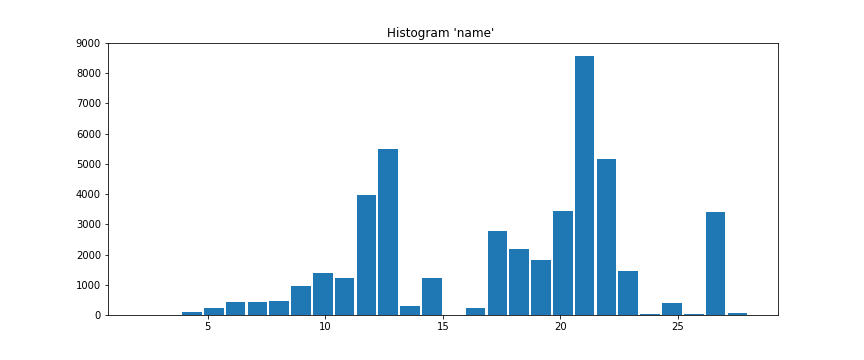
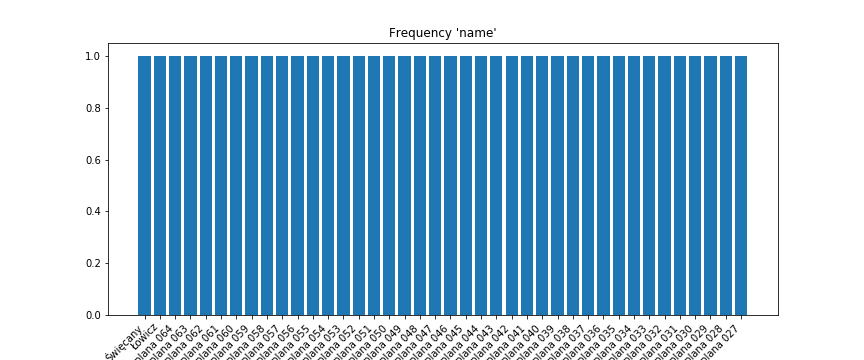

In [6]:
op.profiler.run(df, "name", infer=False, approx_count= True)

### Profiler smart mode (Slower). It just try to infer the column data type and present extra data accordingly. From example datetype columns get extra histograms about minutes, day, week and month. Also can detect array types on data.

INFO:optimus:Processing column 'GeoLocation'...
INFO:optimus:_count_data_types() executed in 36.83 sec
INFO:optimus:count_data_types() executed in 36.84 sec
INFO:optimus:cast_columns() executed in 0.0 sec
INFO:optimus:agg_exprs() executed in 4.67 sec
INFO:optimus:general_stats() executed in 4.68 sec
INFO:optimus:------------------------------
INFO:optimus:Processing column 'GeoLocation'...
INFO:optimus:frequency() executed in 6.22 sec
INFO:optimus:stats_by_column() executed in 0.0 sec
INFO:optimus:Using 'column_exp' to process column 'GeoLocation_len' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'GeoLocation_len' with function _bucketizer
INFO:optimus:hist() executed in 4.79 sec
INFO:optimus:hist_string() executed in 8.07 sec


Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


INFO:optimus:dataset_info() executed in 3.87 sec


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,80.0 MB
String,0
Numeric,0
Date,0
Bool,0
Array,1
Not available,0
Unique,

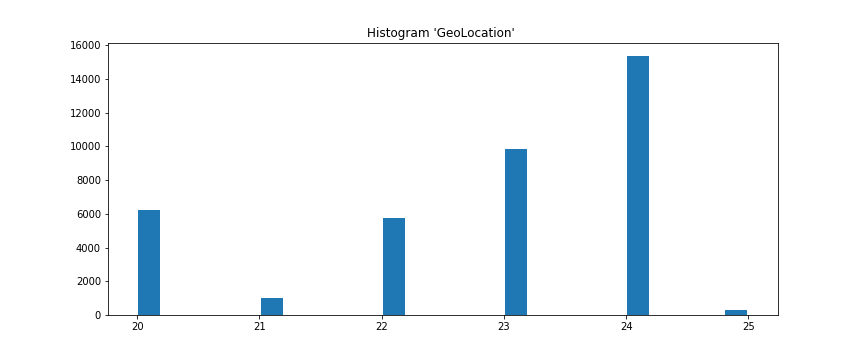
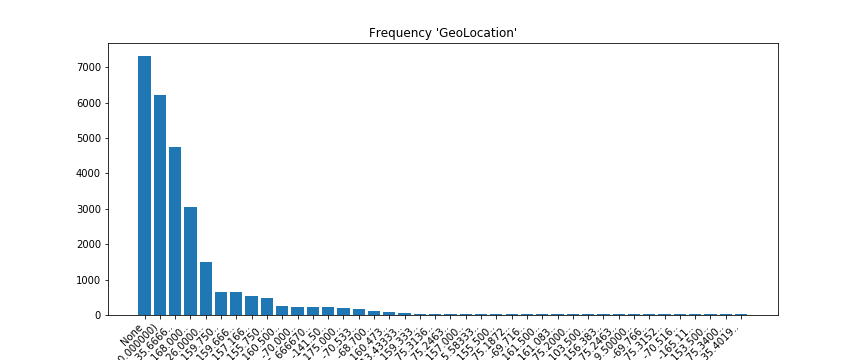

INFO:optimus:run() executed in 65.79 sec


In [6]:
op.profiler.run(df, "GeoLocation",infer=True)

### Plot profile for a specific column

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,100.4 MB
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,

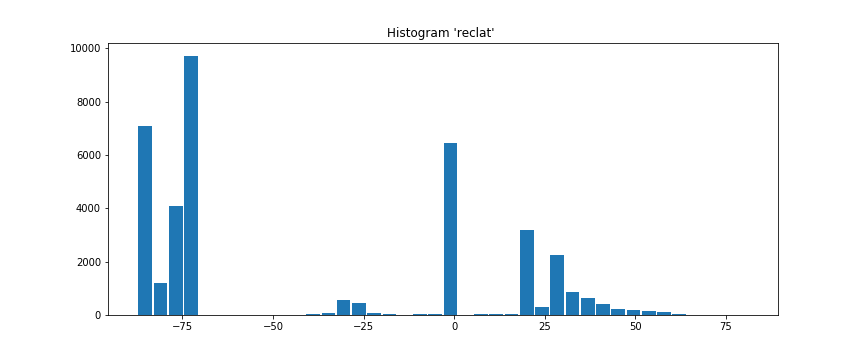
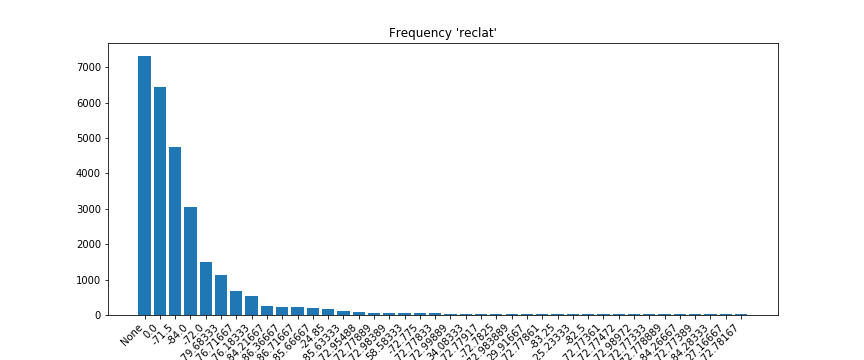

In [8]:
op.profiler.run(df, "reclat")

### Output a json file

### Plot histagram for multiple columns

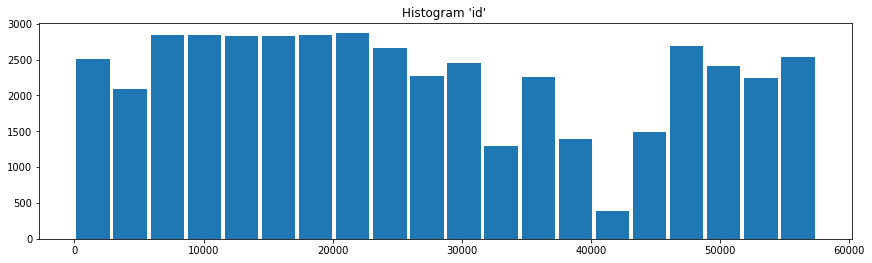

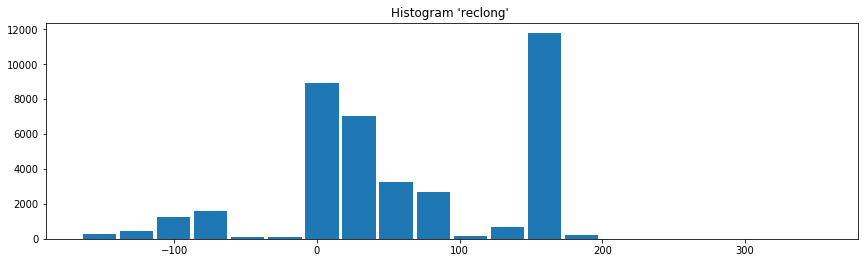

In [9]:
df.plot.hist(["id", "reclong"], 20)

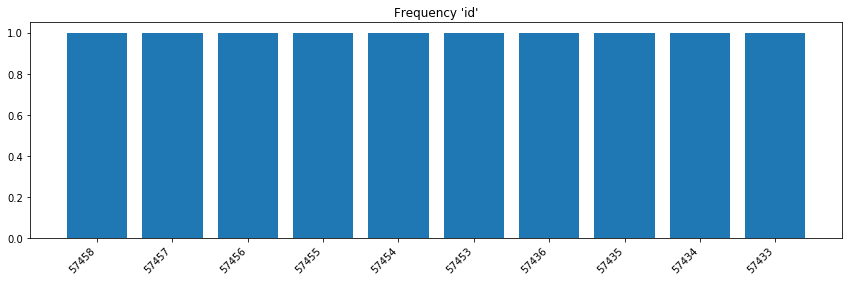

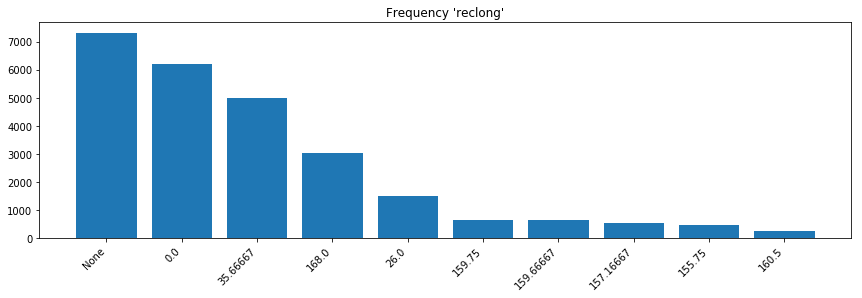

In [10]:
df.plot.frequency(["id", "reclong"], 10)

In [11]:
df.table()

name 1 (string) nullable,id 2 (int) nullable,nametype 3 (string) nullable,recclass 4 (string) nullable,mass (g) 5 (double) nullable,fall 6 (string) nullable,year 7 (string) nullable,reclat 8 (double) nullable,reclong 9 (double) nullable,GeoLocation 10 (string) nullable
Acfer⋅232,240,Valid,H5,725.0,Found,01/01/1991⋅12:00:00⋅AM,27.73944,4.32833,"(27.739440,⋅4.328330)"
Elephant⋅Moraine⋅90232,8641,Valid,L6,16.9,Found,01/01/1990⋅12:00:00⋅AM,-76.28795,156.46841,"(-76.287950,⋅156.468410)"
Grove⋅Mountains⋅020090,30681,Valid,Martian⋅(shergottite),7.5,Found,01/01/2003⋅12:00:00⋅AM,-72.99944,75.26111,"(-72.999440,⋅75.261110)"
Northwest⋅Africa⋅891,31912,Valid,H4,70.8,Found,01/01/2001⋅12:00:00⋅AM,None,None,None
Queen⋅Alexandra⋅Range⋅93098,19187,Valid,H6,1.2,Found,01/01/1993⋅12:00:00⋅AM,-84.5757,162.56524,"(-84.575700,⋅162.565240)"
Queen⋅Alexandra⋅Range⋅94691,20322,Valid,H6,9.6,Found,01/01/1994⋅12:00:00⋅AM,-84.0,168.0,"(-84.000000,⋅168.000000)"
Meteorite⋅Hills⋅00977,16211,Valid,H5,13.2,Found,01/01/2000⋅12:00:00⋅AM,-79.68333,159.75,"(-79.683330,⋅159.750000)"
Grove⋅Mountains⋅020114,46531,Valid,L3,1.0,Found,01/01/2003⋅12:00:00⋅AM,-72.98194,75.25167,"(-72.981940,⋅75.251670)"
Pecora⋅Escarpment⋅91483,18774,Valid,H5,5.5,Found,01/01/1991⋅12:00:00⋅AM,-85.55819,-68.31586,"(-85.558190,⋅-68.315860)"
Ramlat⋅as⋅Sahmah⋅390,55656,Valid,H3.8-6,0.69,Found,01/01/2010⋅12:00:00⋅AM,20.0949,55.69318,"(20.094900,⋅55.693180)"


In [12]:
df.cols.count_na("*")

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


{'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 131,
 'fall': 0,
 'year': 288,
 'reclat': 7315,
 'reclong': 7315,
 'GeoLocation': 7315}

In [13]:
a = {'name': 0,
 'id': 0,
 'nametype': 0,
 'recclass': 0,
 'mass (g)': 131,
 'fall': 0,
 'year': 288,
 'reclat': 7315,
 'reclong': 7315,
 'GeoLocation': 7315}

    df.cols.dtypes()

IndentationError: unexpected indent (<ipython-input-13-1cf015ba60d7>, line 12)

In [ ]:
cols = ["id","mass (g)","reclat"]
# We drops nulls because correlation can not handle them
df_not_nulls = df.rows.drop_na(cols)

df_not_nulls.plot.correlation(cols)

In [45]:
df_not_nulls.cols.correlation(["id","mass (g)", "reclat"], output="array")

{'cols': ['id', 'mass (g)', 'reclat'],
 'data': array([[ 1.        , -0.01794746,  0.27151272],
        [-0.01794746,  1.        ,  0.02908721],
        [ 0.27151272,  0.02908721,  1.        ]])}